In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [14]:
Q_fl = np.array([[0.18047158, 0.17232854, 0.17232854, 0.16330496],
 [0.10615563, 0.10575043, 0.09760739, 0.15475672],
 [0.15347714, 0.14684972, 0.14644452, 0.13958106],
 [0.09057477, 0.09057477, 0.08394734, 0.13254844],
 [0.20896709, 0.15181776, 0.14279418, 0.12332225],
 [0.,         0.,         0.,         0.        ],
 [0.17643079, 0.12782969, 0.17643079, 0.04860109],
 [0.,         0.,         0.,         0.        ],
 [0.15181776, 0.20428449, 0.18481256, 0.27045741],
 [0.24682183, 0.37465152, 0.28900668, 0.21347454],
 [0.40367272, 0.34780297, 0.28503307, 0.1745094],
 [0.,         0.,         0.,         0.        ],
 [0.,         0.,         0.,         0.        ],
 [0.27981663, 0.3903403,  0.50897995, 0.34780297],
 [0.51817,    0.72367364, 0.69032635, 0.62234001],
 [0.,         0.,         0.,         0.        ]])

In [32]:
def get_text_color(rgb):
    """Returns white or black depending on the brightness of the background color."""
    r, g, b = rgb[:3]  # Get RGB values (ignore alpha if present)
    brightness = (0.299 * r + 0.587 * g + 0.114 * b)  # Perceived brightness formula
    return 'white' if brightness < 0.5 else 'black'

def plot_q_values(Q, title='Q-Values'):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Define the grid dimensions (4x4)
    grid_size = 4
    
    # Normalize Q-values for color mapping
    norm = plt.Normalize(Q.min(), Q.max())
    cmap = plt.cm.inferno  # Colormap for the Q-values

    # Define the positions for the grid cells
    for i in range(grid_size):
        for j in range(grid_size):
            # Each state corresponds to a cell, get its index
            state_index = i * grid_size + j
            
            # Get the Q-values for the state
            q_left, q_down, q_right, q_up = Q[state_index]
            
            # Define the cell coordinates
            x = j
            y = grid_size - 1 - i  # Reverse y to match plotting coordinates
            
            # Draw the square grid cell
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)
            
            # Draw the four triangles, colored by the Q-values
            
            # Left triangle (Q_left)
            left_color = cmap(norm(q_left))
            ax.add_patch(patches.Polygon([[x, y], [x, y+1], [x+0.5, y+0.5]], facecolor=left_color, edgecolor='black'))
            left_text_color = get_text_color(left_color)
            ax.text(x + 0.2, y + 0.5, f'{q_left:.2f}', ha='center', va='center', fontsize=8, color=left_text_color)
            
            # Down triangle (Q_down)
            down_color = cmap(norm(q_down))
            ax.add_patch(patches.Polygon([[x, y], [x+1, y], [x+0.5, y+0.5]], facecolor=down_color, edgecolor='black'))
            down_text_color = get_text_color(down_color)
            ax.text(x + 0.5, y + 0.1, f'{q_down:.2f}', ha='center', va='center', fontsize=8, color=down_text_color)
            
            # Right triangle (Q_right)
            right_color = cmap(norm(q_right))
            ax.add_patch(patches.Polygon([[x+1, y], [x+1, y+1], [x+0.5, y+0.5]], facecolor=right_color, edgecolor='black'))
            right_text_color = get_text_color(right_color)
            ax.text(x + 0.8, y + 0.5, f'{q_right:.2f}', ha='center', va='center', fontsize=8, color=right_text_color)
            
            # Up triangle (Q_up)
            up_color = cmap(norm(q_up))
            ax.add_patch(patches.Polygon([[x, y+1], [x+1, y+1], [x+0.5, y+0.5]], facecolor=up_color, edgecolor='black'))
            up_text_color = get_text_color(up_color)
            ax.text(x + 0.5, y + 0.9, f'{q_up:.2f}', ha='center', va='center', fontsize=8, color=up_text_color)
    
    # Set axis limits and labels
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.title(title)
    plt.show()



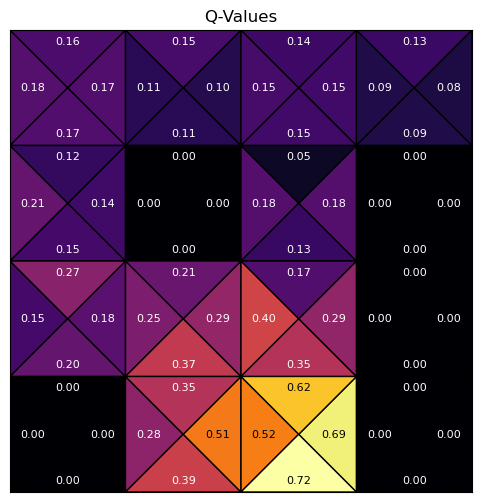

In [33]:
plot_q_values(Q_fl)

In [37]:
def plot_q_values_riverswim(Q, title='Q-Values'):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Define the grid dimensions (1x6)
    grid_size = 6
    
    # Normalize Q-values for color mapping
    norm = plt.Normalize(Q.min(), Q.max())
    cmap = plt.cm.inferno  # Colormap for the Q-values

    # Define the positions for the grid cells
    for i in range(1):
        for j in range(grid_size):
            # Each state corresponds to a cell, get its index
            state_index = i * grid_size + j
            
            # Get the Q-values for the state
            q_left, q_right = Q[state_index]
            
            # Define the cell coordinates
            x = j
            y = 0
            
            # Draw the square grid cell
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)
            
            # Draw the four triangles, colored by the Q-values
            
            # Left triangle (Q_left)
            left_color = cmap(norm(q_left))
            ax.add_patch(patches.Polygon([[x, y+0.5], [x+0.5, y+1], [x+0.5, y]], facecolor=left_color, edgecolor='black'))
            left_text_color = get_text_color(left_color)
            ax.text(x + 0.3, y + 0.5, f'{q_left:.2f}', ha='center', va='center', fontsize=8, color=left_text_color)
            
            # Right triangle (Q_right)
            right_color = cmap(norm(q_right))
            ax.add_patch(patches.Polygon([[x+1, y+0.5], [x+0.5, y+1], [x+0.5, y]], facecolor=right_color, edgecolor='black'))
            right_text_color = get_text_color(right_color)
            ax.text(x + 0.7, y + 0.5, f'{q_right:.2f}', ha='center', va='center', fontsize=8, color=right_text_color)
            
    
    # Set axis limits and labels
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, 1)
    ax.set_aspect(aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    plt.title(title)
    plt.show()



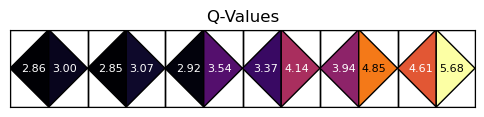

In [38]:
Q_riverswim = np.array([[2.85816785, 3.00333458],
 [2.85316785, 3.07200631],
 [2.91840599, 3.54377239],
 [3.36658377, 4.14406565],
 [3.93686237, 4.8529896 ],
 [4.61034012, 5.68403732]])

plot_q_values_riverswim(Q_riverswim)

In [19]:
def draw_policy_frozenlake(Q, terminal_states, goal, title="Policy for FrozenLake"):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Define the grid dimensions (4x4)
    grid_size = 4
    

    # Define the positions for the grid cells
    for i in range(grid_size):
        for j in range(grid_size):
            # Each state corresponds to a cell, get its index
            state_index = i * grid_size + j
            


            # Get the Q-values for the state
            action = np.argmax(Q[state_index])
            
            # Define the cell coordinates
            x = j
            y = grid_size - 1 - i  # Reverse y to match plotting coordinates
            
            # Draw the square grid cell
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)
            

            if state_index in terminal_states:
                # Draw the terminal state
                x = j
                y = grid_size - 1 - i
                rect = patches.Circle((x+0.5, y+0.5), 0.4, linewidth=1, edgecolor='black', facecolor='blue')
                ax.add_patch(rect)
                continue

            if state_index == goal:
                # Draw the goal state
                x = j
                y = grid_size - 1 - i
                rect = patches.Rectangle((x+0.25, y+0.25), 0.5, 0.5, linewidth=1, edgecolor='black', facecolor='green')
                ax.add_patch(rect)
                continue


            # Draw the four triangles, colored by the Q-values
            if action == 0:
                # Left triangle (Q_left)
                ax.add_patch(patches.Polygon([[x+0.2, y+0.51], [x+0.9, y+0.51], [x+0.9, y+0.49], [x+0.2, y+0.49]], facecolor='black', edgecolor='black'))
                ax.add_patch(patches.Polygon([[x+0.1, y+0.5], [x+0.3, y+0.6], [x+0.3, y+0.4]], facecolor='black', edgecolor='black'))
            elif action == 1:
                # Down triangle (Q_down)
                ax.add_patch(patches.Polygon([[x+0.51, y+0.2], [x+0.51, y+0.9], [x+0.49, y+0.9], [x+0.49, y+0.2]], facecolor='black', edgecolor='black'))
                ax.add_patch(patches.Polygon([[x+0.5, y+0.1], [x+0.6, y+0.3], [x+0.4, y+0.3]], facecolor='black', edgecolor='black'))
            elif action == 2:
                # Right triangle (Q_right)
                ax.add_patch(patches.Polygon([[x+0.1, y+0.51], [x+0.8, y+0.51], [x+0.8, y+0.49], [x+0.1, y+0.49]], facecolor='black', edgecolor='black'))
                ax.add_patch(patches.Polygon([[x+0.9, y+0.5], [x+0.7, y+0.6], [x+0.7, y+0.4]], facecolor='black', edgecolor='black'))
            elif action == 3:
                # Up triangle (Q_up)
                ax.add_patch(patches.Polygon([[x+0.51, y+0.1], [x+0.51, y+0.8], [x+0.49, y+0.8], [x+0.49, y+0.1]], facecolor='black', edgecolor='black'))
                ax.add_patch(patches.Polygon([[x+0.5, y+0.9], [x+0.6, y+0.7], [x+0.4, y+0.7]], facecolor='black', edgecolor='black'))

    # Set axis limits and labels
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.title(title)
    plt.show()



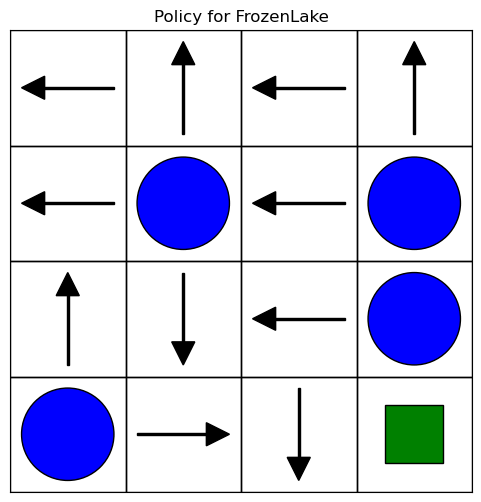

In [39]:
draw_policy_frozenlake(Q_fl, [5, 7, 11, 12], 15)

In [40]:
def draw_policy_riverswim(Q, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Define the grid dimensions (1x6)
    grid_size = 6
    

    # Define the positions for the grid cells
    for i in range(1):
        for j in range(grid_size):
            # Each state corresponds to a cell, get its index
            state_index = i * grid_size + j
            


            # Get the Q-values for the state
            action = np.argmax(Q[state_index])
            
            # Define the cell coordinates
            x = j
            y = 0
            
            # Draw the square grid cell
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
            ax.add_patch(rect)
            


            # Draw the four triangles, colored by the Q-values
            if action == 0:
                # Left triangle (Q_left)
                ax.add_patch(patches.Polygon([[x+0.2, y+0.51], [x+0.9, y+0.51], [x+0.9, y+0.49], [x+0.2, y+0.49]], facecolor='black', edgecolor='black'))
                ax.add_patch(patches.Polygon([[x+0.1, y+0.5], [x+0.3, y+0.6], [x+0.3, y+0.4]], facecolor='black', edgecolor='black'))
            elif action == 1:
                # Right triangle (Q_right)
                ax.add_patch(patches.Polygon([[x+0.1, y+0.51], [x+0.8, y+0.51], [x+0.8, y+0.49], [x+0.1, y+0.49]], facecolor='black', edgecolor='black'))
                ax.add_patch(patches.Polygon([[x+0.9, y+0.5], [x+0.7, y+0.6], [x+0.7, y+0.4]], facecolor='black', edgecolor='black'))

    # Set axis limits and labels
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, 1)
    ax.set_aspect(aspect=1)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title(title)
    plt.show()

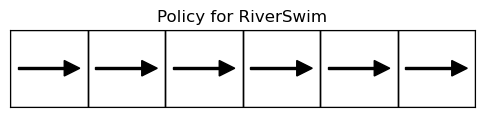

In [41]:
draw_policy_riverswim(Q_riverswim, "Policy for RiverSwim")